In [2]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd

url_get = r.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')
url_get.content[1:500]
soup = BeautifulSoup(url_get.content,'html.parser')
soup
table = soup.find('table',attrs={'class':'history-rates-data'})
table
#tanggal 
row = table.find_all('span', attrs={'class':'w'})
row_length = len(row)
row_length







130

In [10]:

temp = []

for i in range(0,row_length):
    period = table.find_all('a', attrs={'class':'w'})[i].text
    kurs_dolar = table.find_all('span', attrs={'class':'w'})[i].text
    temp.append((period,kurs_dolar))            

temp

[('2024-8-30', '1 USD = 15,532 IDR'),
 ('2024-8-29', '1 USD = 15,466 IDR'),
 ('2024-8-28', '1 USD = 15,446 IDR'),
 ('2024-8-27', '1 USD = 15,481 IDR'),
 ('2024-8-26', '1 USD = 15,483 IDR'),
 ('2024-8-23', '1 USD = 15,401 IDR'),
 ('2024-8-22', '1 USD = 15,751 IDR'),
 ('2024-8-21', '1 USD = 15,508 IDR'),
 ('2024-8-20', '1 USD = 15,449 IDR'),
 ('2024-8-19', '1 USD = 15,530 IDR'),
 ('2024-8-16', '1 USD = 15,698 IDR'),
 ('2024-8-15', '1 USD = 15,773 IDR'),
 ('2024-8-14', '1 USD = 15,634 IDR'),
 ('2024-8-13', '1 USD = 15,756 IDR'),
 ('2024-8-12', '1 USD = 15,948 IDR'),
 ('2024-8-9', '1 USD = 15,950 IDR'),
 ('2024-8-8', '1 USD = 15,985 IDR'),
 ('2024-8-7', '1 USD = 16,030 IDR'),
 ('2024-8-6', '1 USD = 16,175 IDR'),
 ('2024-8-5', '1 USD = 16,222 IDR'),
 ('2024-8-2', '1 USD = 16,176 IDR'),
 ('2024-8-1', '1 USD = 16,275 IDR'),
 ('2024-7-31', '1 USD = 16,251 IDR'),
 ('2024-7-30', '1 USD = 16,326 IDR'),
 ('2024-7-29', '1 USD = 16,297 IDR'),
 ('2024-7-26', '1 USD = 16,304 IDR'),
 ('2024-7-25', '1 U

<Axes: xlabel='Period'>

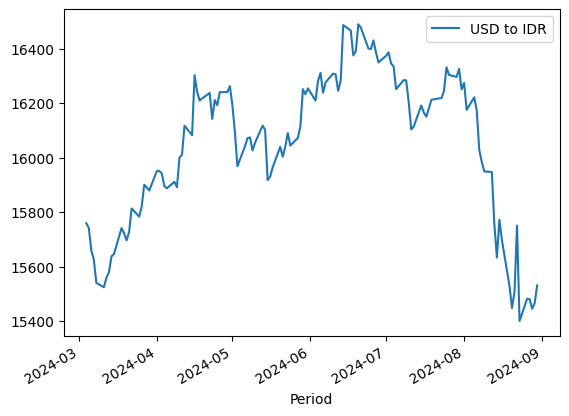

In [9]:
temp = temp[::-1]
temp

not_clean_data = pd.DataFrame(temp,columns=('Period','USD to IDR'))
not_clean_data
not_clean_data['Period'] = not_clean_data['Period'].astype('datetime64[ns]')
not_clean_data['USD to IDR']=not_clean_data['USD to IDR'].str.replace('1 USD =','')
not_clean_data['USD to IDR'] = not_clean_data['USD to IDR'].str.replace(' IDR','')
not_clean_data['USD to IDR'] = not_clean_data['USD to IDR'].str.replace(',','')
not_clean_data['USD to IDR'] = not_clean_data['USD to IDR'].astype('int64')
not_clean_data

df= not_clean_data.set_index('Period')
df

df.plot()